In [16]:
#Visualization of dataframes - Salli
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
numbers_df = pd.read_csv('numbers.csv', delimiter=';')
# Inspect the columns to verify they have been read correctly
print(numbers_df.columns)  # Check if columns are now properly separated
# Ensure all columns are numeric except 'Year'
numbers_df['Year'] = pd.to_numeric(numbers_df['Year'], errors='coerce')

# Set 'Year' as the index
numbers_df.set_index('Year', inplace=True)

Index(['Year', '[0]', '[1-4]', '[5-9]', '[10-14]', '[15-19]', '[20-24]',
       '[25-29]', '[30-34]', '[35-39]', '[40-44]', '[45-49]', '[50-54]',
       '[55-59]', '[60-64]', '[65-69]', '[70-74]', '[75-79]', '[80-84]',
       '[85+]', '[All]'],
      dtype='object')


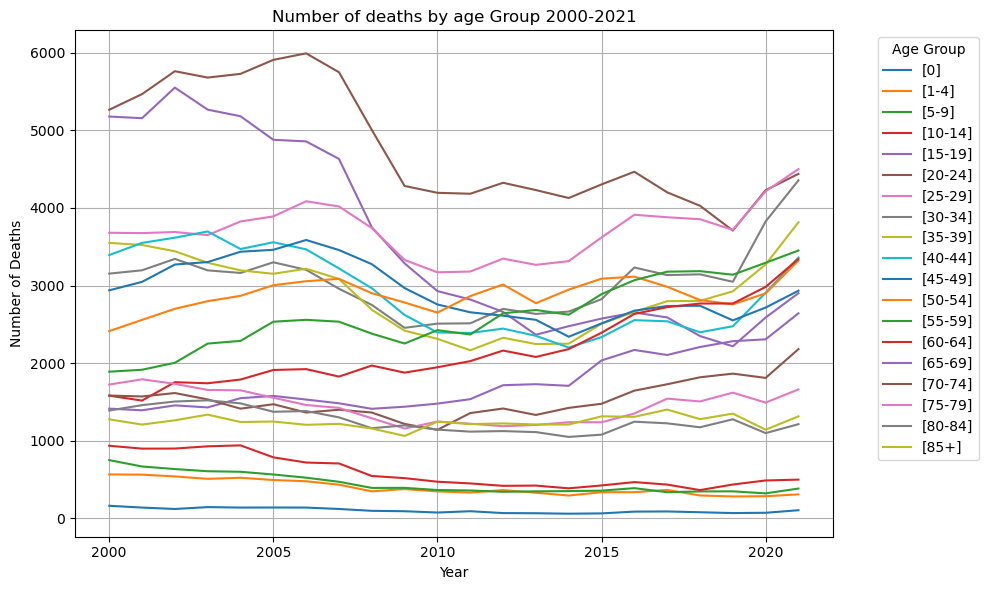

In [28]:
# Drop the column labeled '[All]' to exclude it from plotting
numbers_df_no_all = numbers_df.drop(columns='[All]')

# Plotting line plot for the number of deaths by age group
plt.figure(figsize=(10, 6))
for column in numbers_df_no_all.columns:
    plt.plot(numbers_df_no_all.index, numbers_df_no_all[column], label=column)

plt.title('Number of deaths by age group from 2000-2021')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
#plt.savefig('number_of_deaths_over_time.png', dpi=300)  # Save as PNG with 300 dpi
#plt.savefig('number_of_deaths_over_time.pdf')  # Save as PDF for vector quality
plt.show()

In [55]:
# Load the CSV file
death_rates_df = pd.read_csv('death_rates.csv', delimiter=';')

# Inspect the columns to verify their names
print(death_rates_df.columns)

Index(['Year', '[0]', '[1-4]', '[5-9]', '[10-14]', '[15-19]', '[20-24]',
       '[25-29]', '[30-34]', '[35-39]', '[40-44]', '[45-49]', '[50-54]',
       '[55-59]', '[60-64]', '[65-69]', '[70-74]', '[75-79]', '[80-84]',
       '[85+]', ' All',
       'Age-standardized death rate per 100 000 standard population2'],
      dtype='object')



Data Types Before Conversion:
Year                                                            float64
[0]                                                              object
[1-4]                                                            object
[5-9]                                                            object
[10-14]                                                          object
[15-19]                                                          object
[20-24]                                                          object
[25-29]                                                          object
[30-34]                                                          object
[35-39]                                                          object
[40-44]                                                          object
[45-49]                                                          object
[50-54]                                                          object
[55-59]                          

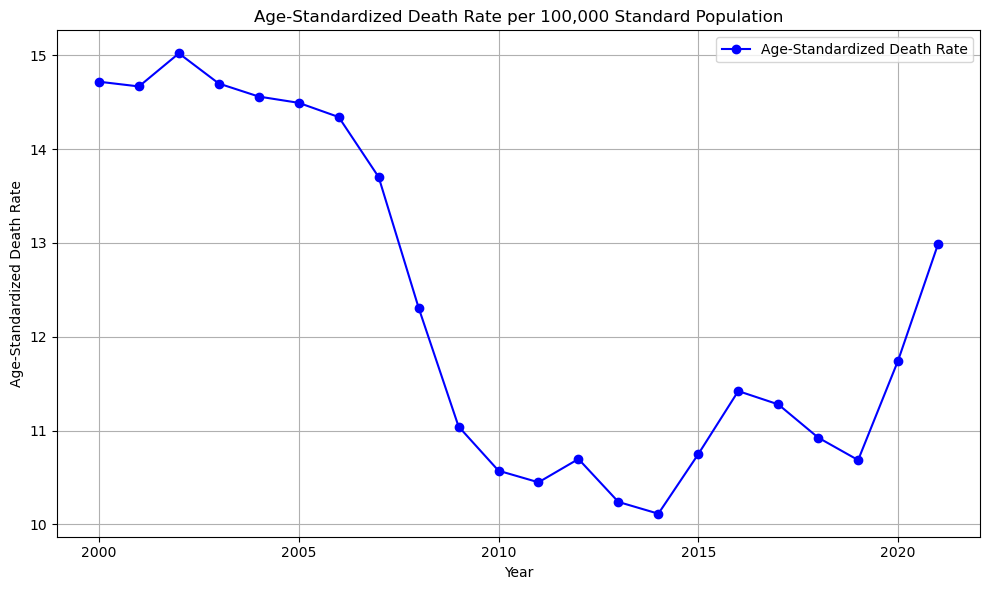

In [56]:

# Strip any leading/trailing spaces from column names to clean them up
death_rates_df.columns = death_rates_df.columns.str.strip()

# Drop any rows that are completely empty
death_rates_df.dropna(how='all', inplace=True)

# Define the Year and Age-Standardized Rate columns after cleaning
year_column = 'Year'
age_standardized_column = 'Age-standardized death rate per 100 000 standard population2'

# Step 1: Inspect the data types and values
print("\nData Types Before Conversion:")
print(death_rates_df.dtypes)

print("\nSample Data Before Conversion:")
print(death_rates_df[[year_column, age_standardized_column]].head(10))

# Step 2: Remove commas and convert to numeric
death_rates_df[age_standardized_column] = death_rates_df[age_standardized_column].str.replace(',', '.', regex=False)

# Step 3: Convert Year and Age-Standardized Death Rate columns to numeric types
death_rates_df[year_column] = pd.to_numeric(death_rates_df[year_column], errors='coerce')
death_rates_df[age_standardized_column] = pd.to_numeric(death_rates_df[age_standardized_column], errors='coerce')

# Drop any rows where Year or Age-Standardized Death Rate is NaN
death_rates_df = death_rates_df.dropna(subset=[year_column, age_standardized_column])

# Print out a few rows to check if the data is correct
print("\nCleaned Data Sample After Conversion:")
print(death_rates_df[[year_column, age_standardized_column]].head())

# Step 4: Plotting Age-Standardized Death Rate per 100,000 over the years (only if there is data)
if not death_rates_df.empty:
    plt.figure(figsize=(10, 6))
    plt.plot(death_rates_df[year_column], death_rates_df[age_standardized_column], marker='o', linestyle='-', color='b', label='Age-Standardized Death Rate')

    # Customizing the plot
    plt.title('Age-Standardized Death Rate per 100,000 Standard Population')
    plt.xlabel('Year')
    plt.ylabel('Age-Standardized Death Rate')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()

    # Save the plot if needed
    plt.savefig('age_standardized_death_rate_fixed.png', dpi=300)

    # Show the plot
    plt.show()
else:
    print("Error: No data available to plot.")



Data Types Before Conversion:
Year                                                            float64
[0]                                                              object
[1-4]                                                            object
[5-9]                                                            object
[10-14]                                                          object
[15-19]                                                          object
[20-24]                                                          object
[25-29]                                                          object
[30-34]                                                          object
[35-39]                                                          object
[40-44]                                                          object
[45-49]                                                          object
[50-54]                                                          object
[55-59]                          

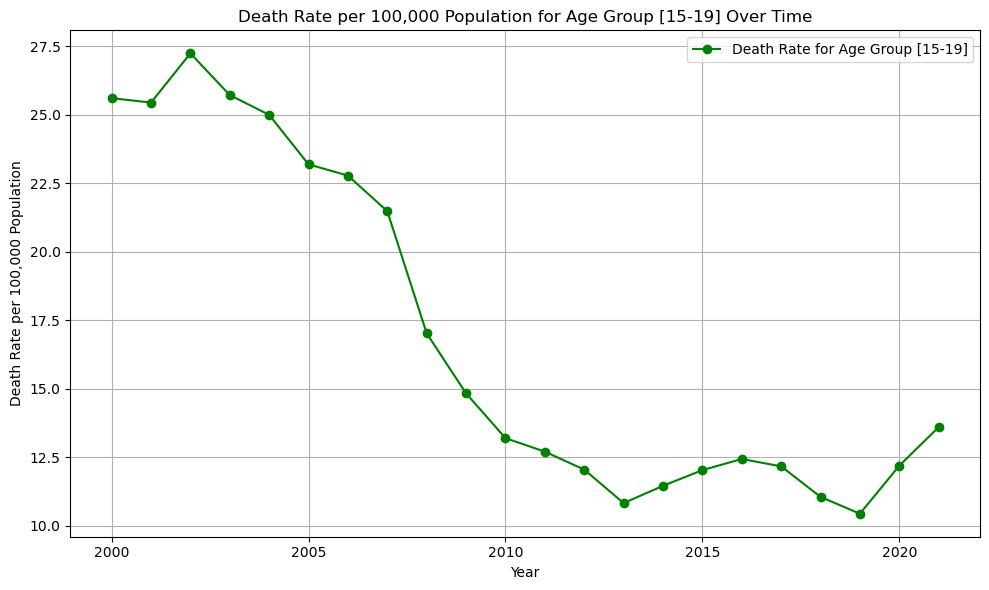

In [57]:
age_group_column = '[15-19]'  # Example: choose the age group '[15-19]'

# Step 1: Inspect the data types and values
print("\nData Types Before Conversion:")
print(death_rates_df.dtypes)

print("\nSample Data Before Conversion:")
print(death_rates_df[[year_column, age_group_column]].head(10))

# Step 2: Replace commas with periods if needed and convert columns to numeric
death_rates_df[year_column] = pd.to_numeric(death_rates_df[year_column], errors='coerce')
death_rates_df[age_group_column] = death_rates_df[age_group_column].str.replace(',', '.', regex=False)
death_rates_df[age_group_column] = pd.to_numeric(death_rates_df[age_group_column], errors='coerce')

# Drop any rows where Year or age group data is NaN
death_rates_df = death_rates_df.dropna(subset=[year_column, age_group_column])

# Step 3: Plotting the death rate for the selected age group
plt.figure(figsize=(10, 6))
plt.plot(death_rates_df[year_column], death_rates_df[age_group_column], marker='o', linestyle='-', color='g', label=f'Death Rate for Age Group {age_group_column}')

# Customizing the plot
plt.title(f'Death Rate per 100,000 Population for Age Group {age_group_column} Over Time')
plt.xlabel('Year')
plt.ylabel('Death Rate per 100,000 Population')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Save the plot if needed
plt.savefig(f'death_rate_{age_group_column.strip("[]")}_over_time.png', dpi=300)

# Show the plot
plt.show()

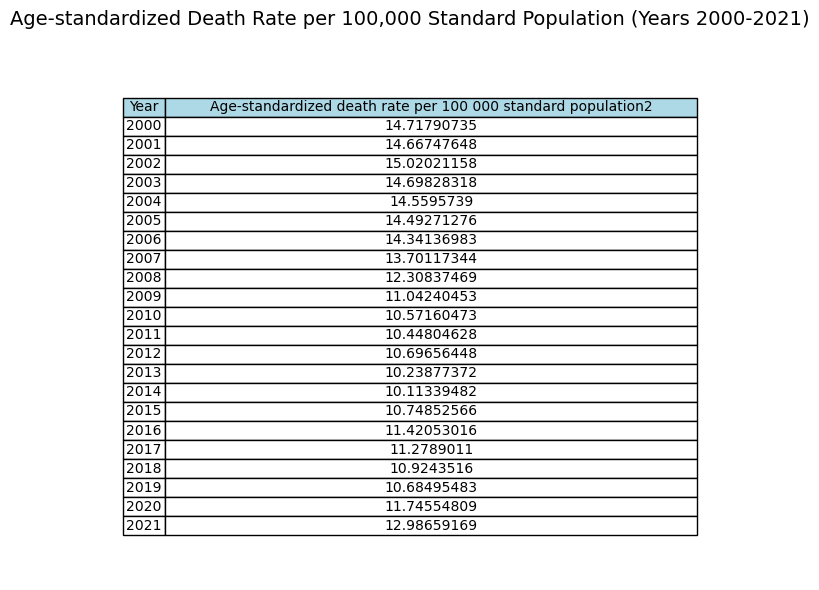

In [64]:
# Define the Year column and the Age-Standardized Death Rate column
year_column = 'Year'
age_standardized_column = 'Age-standardized death rate per 100 000 standard population2'

# Select only the relevant columns
table_data = death_rates_df[[year_column, age_standardized_column]].copy()

# Drop empty rows at the end
table_data.dropna(subset=[year_column, age_standardized_column], inplace=True)

# Replace commas with periods for numeric conversion (if needed)
#table_data[age_standardized_column] = table_data[age_standardized_column].str.replace(',', '.', regex=False)

# Convert Year to numeric and then to integer, then to string to prevent float formatting
table_data[year_column] = pd.to_numeric(table_data[year_column], errors='coerce').astype(int).astype(str)

# Step 1: Create a Matplotlib figure to render the table
fig, ax = plt.subplots(figsize=(8, 6))

# Hide axes
ax.axis('off')

# Create a table plot
table = ax.table(cellText=table_data.values, 
                 colLabels=table_data.columns, 
                 cellLoc='center', 
                 loc='center',
                 colColours=['lightblue', 'lightblue'])

# Customize table appearance
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(table_data.columns))))

# Add title
plt.title('Age-standardized Death Rate per 100,000 Standard Population (Years 2000-2021)', fontsize=14, pad=20)

# Show the plot
plt.tight_layout()
plt.show()


In [66]:
plt.savefig('age_standardized_death_rate_table.png', dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

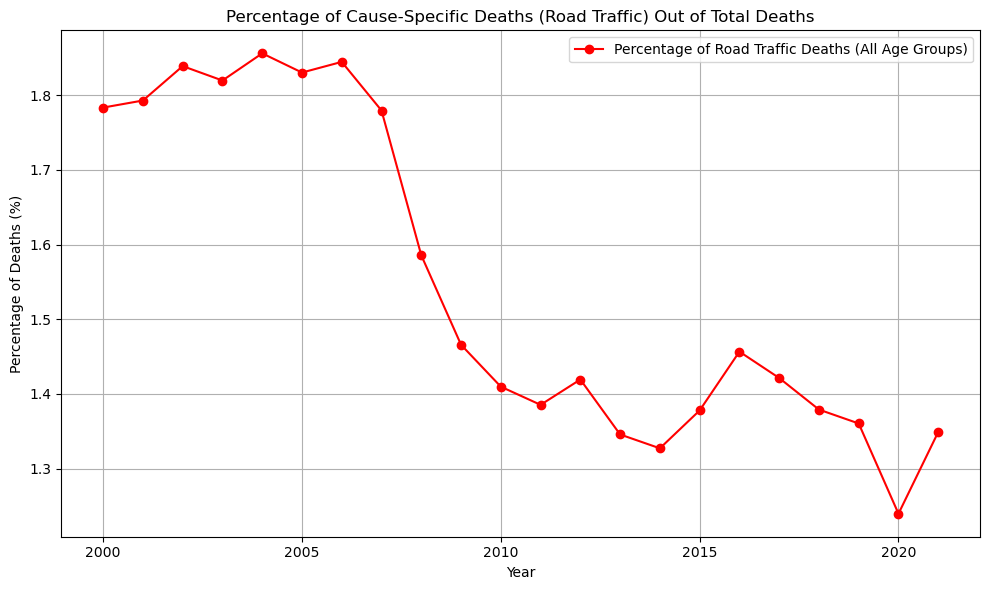

In [71]:


# Load the CSV file with the correct delimiter
percentage_df = pd.read_csv('precentages.csv', delimiter=';')

# Strip any leading/trailing spaces from column names to clean them up
percentage_df.columns = percentage_df.columns.str.strip()

# Define the Year column and the [All] column to visualize
year_column = 'Year'
all_column = '[All]'  # Represents the percentage of road traffic deaths out of total deaths for all age groups

# Drop empty rows at the end of the DataFrame
percentage_df.dropna(how='all', inplace=True)

# Step 1: Clean the [All] column and Year column for proper data types
# Convert Year to numeric
percentage_df[year_column] = pd.to_numeric(percentage_df[year_column], errors='coerce')

# Replace commas with periods in the [All] column and convert to numeric
percentage_df[all_column] = percentage_df[all_column].str.replace(',', '.', regex=False)
percentage_df[all_column] = pd.to_numeric(percentage_df[all_column], errors='coerce')

# Drop rows with NaN values in Year or [All] columns
percentage_df.dropna(subset=[year_column, all_column], inplace=True)

# Step 2: Plotting the percentage of cause-specific deaths out of total deaths for [All]
plt.figure(figsize=(10, 6))
plt.plot(percentage_df[year_column], percentage_df[all_column], marker='o', linestyle='-', color='r', label='Percentage of Road Traffic Deaths (All Age Groups)')

# Customizing the plot
plt.title('Percentage of Cause-Specific Deaths (Road Traffic) Out of Total Deaths')
plt.xlabel('Year')
plt.ylabel('Percentage of Deaths (%)')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Save the plot as an image if needed
plt.savefig('percentage_cause_specific_deaths_all.png', dpi=300)

# Show the plot
plt.show()


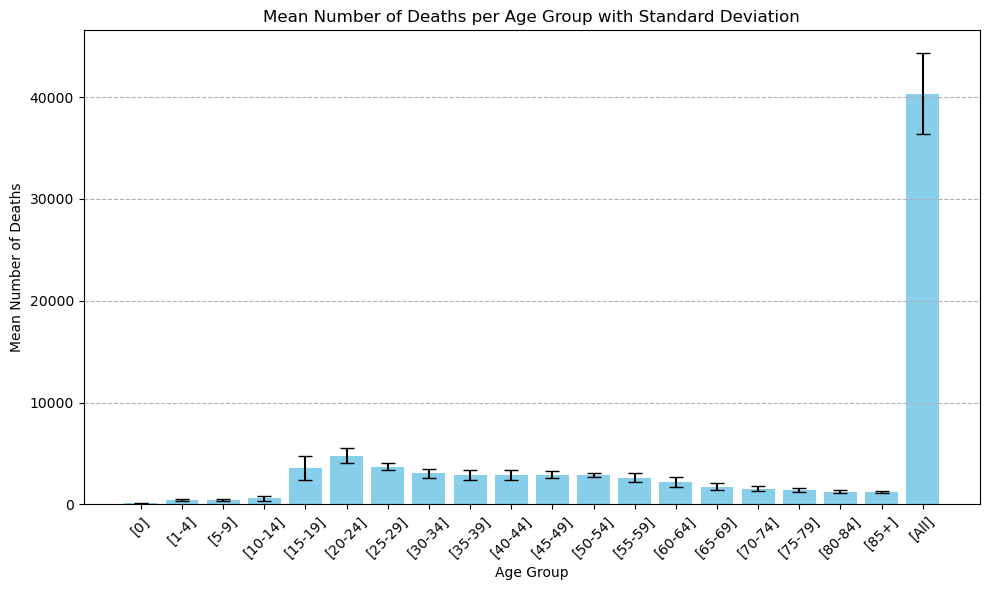

In [72]:
#mean

# Drop empty rows at the end
numbers_df.dropna(how='all', inplace=True)

# Calculate mean and standard deviation for each age group
mean_deaths = numbers_df.mean()
std_deaths = numbers_df.std()

# Plot mean with error bars representing standard deviation
plt.figure(figsize=(10, 6))
plt.bar(mean_deaths.index, mean_deaths.values, yerr=std_deaths.values, capsize=5, color='skyblue')
plt.title('Mean Number of Deaths per Age Group with Standard Deviation')
plt.xlabel('Age Group')
plt.ylabel('Mean Number of Deaths')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()

# Save and show the plot
#plt.savefig('mean_std_deaths_per_age_group.png', dpi=300)
plt.show()